# Setup

In [24]:
library(scales)
library(broom)
library(glmnet)
library(tidyverse)

theme_set(theme_bw())

options(repr.plot.width=4, repr.plot.height=3)

set.seed(42)

# Load data

In [25]:
load('trips.RData')

# count the number of trips per day
trips_per_day <- trips %>%
  group_by(ymd) %>%
  summarize(num_trips=n())

# join trip info and weather for each day
model_data <- inner_join(trips_per_day, weather, by="ymd")

# Create model matrix

In [26]:
K <- 10
form <- formula(~ poly(tmin, K, raw = T))

X <- model.matrix(form, data=model_data)
y <- model_data$num_trips

# Fit model with L2 regularization (ridge)

In [27]:
model <- glmnet(X, y, alpha=0)
coef(model, s = 100)

12 x 1 sparse Matrix of class "dgCMatrix"
                                     1
(Intercept)               4.481125e+03
(Intercept)               .           
poly(tmin, K, raw = T)1   2.088660e+03
poly(tmin, K, raw = T)2   2.007451e+02
poly(tmin, K, raw = T)3   1.979780e+01
poly(tmin, K, raw = T)4   1.751579e+00
poly(tmin, K, raw = T)5   1.196716e-01
poly(tmin, K, raw = T)6   1.860703e-03
poly(tmin, K, raw = T)7  -1.438847e-03
poly(tmin, K, raw = T)8  -3.881373e-04
poly(tmin, K, raw = T)9  -7.405448e-05
poly(tmin, K, raw = T)10 -1.235406e-05

# Fit model with L1 regularization (lasso)

In [28]:
model <- glmnet(X, y, alpha=1)
coef(model, s = 100)

12 x 1 sparse Matrix of class "dgCMatrix"
                                     1
(Intercept)               4.181135e+03
(Intercept)               .           
poly(tmin, K, raw = T)1   1.392733e+03
poly(tmin, K, raw = T)2   5.130486e+02
poly(tmin, K, raw = T)3   .           
poly(tmin, K, raw = T)4   .           
poly(tmin, K, raw = T)5   .           
poly(tmin, K, raw = T)6   .           
poly(tmin, K, raw = T)7   .           
poly(tmin, K, raw = T)8   .           
poly(tmin, K, raw = T)9   .           
poly(tmin, K, raw = T)10 -2.437055e-05

# Cross-validation for L2 regularization (ridge)

12 x 1 sparse Matrix of class "dgCMatrix"
                                     1
(Intercept)               4.586453e+03
(Intercept)               .           
poly(tmin, K, raw = T)1   2.077781e+03
poly(tmin, K, raw = T)2   1.981932e+02
poly(tmin, K, raw = T)3   1.951539e+01
poly(tmin, K, raw = T)4   1.731759e+00
poly(tmin, K, raw = T)5   1.196634e-01
poly(tmin, K, raw = T)6   2.160766e-03
poly(tmin, K, raw = T)7  -1.371050e-03
poly(tmin, K, raw = T)8  -3.772489e-04
poly(tmin, K, raw = T)9  -7.258735e-05
poly(tmin, K, raw = T)10 -1.218240e-05

[1] 5674.451

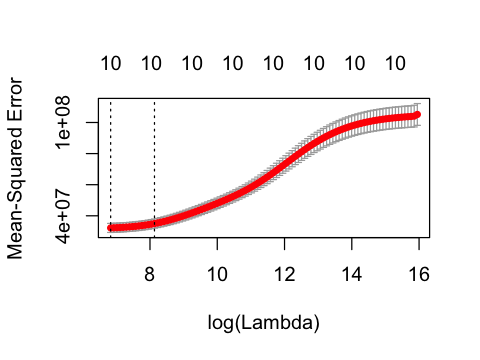

In [29]:
# default grid
cvfit <- cv.glmnet(X, y, alpha=0)
coef(cvfit, s="lambda.min")
plot(cvfit)
sqrt(min(cvfit$cvm))

12 x 1 sparse Matrix of class "dgCMatrix"
                                     1
(Intercept)               6.962930e+03
(Intercept)               .           
poly(tmin, K, raw = T)1  -4.876281e+02
poly(tmin, K, raw = T)2   5.365113e+02
poly(tmin, K, raw = T)3   6.751874e+01
poly(tmin, K, raw = T)4   2.890086e+00
poly(tmin, K, raw = T)5  -3.528983e-01
poly(tmin, K, raw = T)6  -9.744737e-02
poly(tmin, K, raw = T)7  -1.310470e-02
poly(tmin, K, raw = T)8  -1.090544e-03
poly(tmin, K, raw = T)9  -2.168890e-06
poly(tmin, K, raw = T)10  2.228832e-05

[1] 5643.715

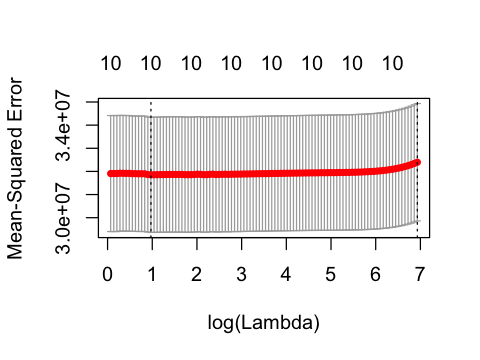

In [30]:
# zoom in
grid <- 2^seq(0.1,10,length=100)
cvfit <- cv.glmnet(X, y, alpha=0, lambda = grid)
coef(cvfit, s="lambda.min")
plot(cvfit)
sqrt(min(cvfit$cvm))

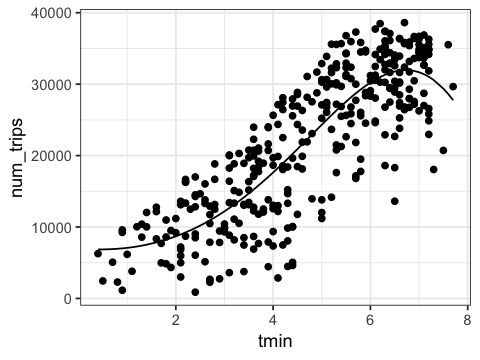

In [31]:
# add predictions
model_data$pred <- as.vector(predict(cvfit, X, s = "lambda.min"))

# plot
ggplot(model_data, aes(x = tmin)) +
  geom_point(aes(y = num_trips)) +
  geom_line(aes(y = pred))

# Cross-validation for L1 regularization (lasso)

12 x 1 sparse Matrix of class "dgCMatrix"
                                     1
(Intercept)               5.780443e+03
(Intercept)               .           
poly(tmin, K, raw = T)1   5.488399e+01
poly(tmin, K, raw = T)2   7.359783e+02
poly(tmin, K, raw = T)3   .           
poly(tmin, K, raw = T)4   .           
poly(tmin, K, raw = T)5   .           
poly(tmin, K, raw = T)6   .           
poly(tmin, K, raw = T)7   .           
poly(tmin, K, raw = T)8  -1.673524e-04
poly(tmin, K, raw = T)9  -2.301207e-04
poly(tmin, K, raw = T)10  .           

[1] 5628.615

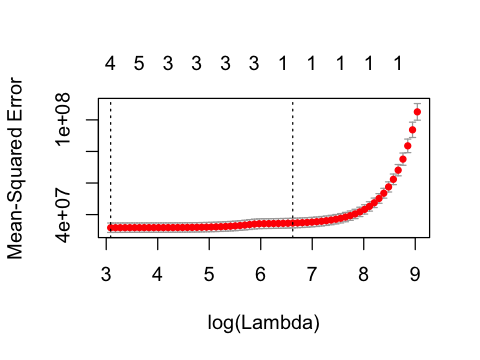

In [32]:
# default grid
cvfit <- cv.glmnet(X, y, alpha=1)
coef(cvfit, s="lambda.min")
plot(cvfit)
sqrt(min(cvfit$cvm))

12 x 1 sparse Matrix of class "dgCMatrix"
                                     1
(Intercept)               5.736156e+03
(Intercept)               .           
poly(tmin, K, raw = T)1   .           
poly(tmin, K, raw = T)2   7.583759e+02
poly(tmin, K, raw = T)3   .           
poly(tmin, K, raw = T)4   .           
poly(tmin, K, raw = T)5   .           
poly(tmin, K, raw = T)6   .           
poly(tmin, K, raw = T)7   .           
poly(tmin, K, raw = T)8  -1.479353e-03
poly(tmin, K, raw = T)9  -3.582571e-05
poly(tmin, K, raw = T)10 -3.489953e-06

[1] 5628.167

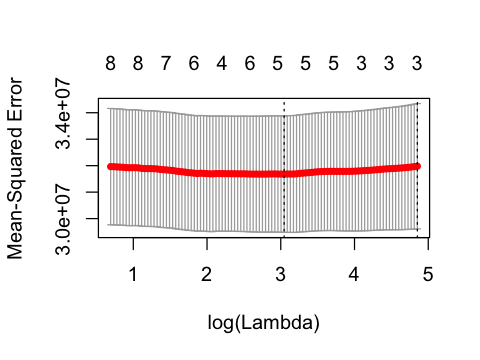

In [33]:
# zoom in
grid <- 2^seq(1,7,length=100)
cvfit <- cv.glmnet(X, y, alpha=1, lambda = grid)
coef(cvfit, s="lambda.min")
plot(cvfit)
sqrt(min(cvfit$cvm))

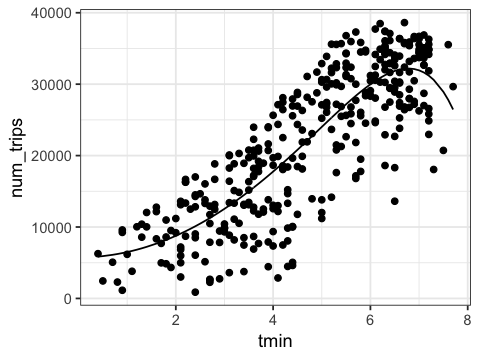

In [34]:
# add predictions
model_data$pred <- as.vector(predict(cvfit, X, s = "lambda.min"))

# plot
ggplot(model_data, aes(x = tmin)) +
  geom_point(aes(y = num_trips)) +
  geom_line(aes(y = pred))